# “文检图”任务 预处理

基于图像检索的模型和算法，利用附件 2 中“word_test.csv”文件的文本信息，对附件 2 的 ImageData 文件夹的图像进行图像检索，并罗列检索相似度较高的前五张图像，

将结果存放在“result1.csv”文件中（模板文件详见附件4的result1.csv）。

其中，ImageData文件夹中的图像 ID 详见附件 2 的“image_data.csv”文件。

In [1]:
from PIL import Image
from io import BytesIO
import base64
import pandas as pd 
import numpy as np
import re  
import os  
import base64  
import csv

## 生成附件2的ImageData文件夹图片的模型数据

In [2]:

##图片转为base64：
def img2base64(img_path):
    img = Image.open(img_path) # 访问图片路径
    img_buffer = BytesIO()
    img.save(img_buffer, format=img.format)
    byte_data = img_buffer.getvalue()
    base64_str = base64.b64encode(byte_data) # bytes
    base64_str = base64_str.decode("utf-8") # str
    return base64_str

In [3]:
Path_ =  r"D:/2024tdb/B/B题-示例数据/示例数据/附件2/"   ##附件二文件夹路径
Path_img = r"D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData"  ##附件二 ImageData文件夹路径
Path_image_data_csv = r"D:/2024tdb/B/B题-示例数据/示例数据/附件2/image_data.csv"  ##附件二 image_data.csv路径
Path_word_test_csv = r"D:/2024tdb/B/B题-示例数据/示例数据/附件2/word_test.csv"  ##附件二 word_test.csv路径

In [4]:
## 读取图片对应的image_data.csv进行，图片id新生成对应表，以及图片clip模型数据：

df = pd.read_csv(Path_image_data_csv,encoding='utf-8') 
df 

new_image_ids = []
for image_id in df['image_id']:
    s = image_id.replace('-',"")
    new_image_id = re.findall(r'\d+', s)[0] 
    new_image_ids.append(new_image_id)
df['new_image_id'] = new_image_ids
df 


,image_id,new_image_id
0,Image14001007-4042.jpg,140010074042
1,Image14001007-4045.jpg,140010074045
2,Image14001007-4081.jpg,140010074081
3,Image14001007-4116.jpg,140010074116
4,Image14001007-4130.jpg,140010074130
...,...,...
995,Image14001013-7916.jpg,140010137916
996,Image14001013-7935.jpg,140010137935
997,Image14001013-7983.jpg,140010137983
998,Image14001013-7995.jpg,140010137995


In [5]:
df.to_csv("任务二image_id对照表.csv",encoding='utf-8',index=False)

In [6]:
def creat_clipdata(df, ImageData_PATH, task):
     with open(f"{task}_imgs.tsv", 'w', newline='',encoding='utf-8') as tsvfile:
        tsvwriter = csv.writer(tsvfile, delimiter='\t')
        for index, row in df.iterrows():
            imgpath = os.path.join(ImageData_PATH,row['image_id'])
            b64img = img2base64(imgpath)
            tsvwriter.writerow([row['new_image_id'],b64img])
        tsvfile.close()

In [7]:
##生成待预测的图片的模型数据：
creat_clipdata(df=df, ImageData_PATH=Path_img, task="predict1")


## 生成附件2，文本的模型数据

In [8]:
## 读取文本对应的word_test.csv进行，文本id新生成对应表，以及文本clip模型数据：

# df = pd.read_csv(Path_word_test_csv, encoding="unicode_escape") 
df = pd.read_csv(Path_word_test_csv, encoding="gb18030") 
new_text_ids = []
for text_id in df['text_id']:
    s = text_id.replace('-',"")
    new_text_id = re.findall(r'\d+', s)[0] 
    new_text_ids.append(new_text_id)
df['new_text_id'] = new_text_ids
df 

,text_id,caption,new_text_id
0,Word-1000007250,"如果接线我们可以接两根相线,或者说两根火线, 液位继电器侧面我们",1000007250
1,Word-1000027950,这种野生植物在田地边有很多可以做菜吃也可以当药材,1000027950
2,Word-1000020736,"酷热的夏天经历一天工作后,裸露的胳膊被晒黑了几个色度.",1000020736
3,Word-1000005068,清初四大疑案哪个是真哪个是假你分得清吗,1000005068
4,Word-1000045877,【每日一笑4】凤凰传奇:过不去了是吧?,1000045877
...,...,...,...
95,Word-1000007864,优惠完售价不到宝马x5一半新款凯迪拉克xt6是不是更值得买,1000007864
96,Word-1000035092,"因为去发射场工作不能带家属,所以<人名>数个月都没有见到于途,而于",1000035092
97,Word-1000011964,"下面,就为您带来今天的残奥晚报,重温残奥赛场的精彩瞬间.",1000011964
98,Word-1000007663,"语 文 语文老师们的板书大多走的是端正风雅的路线,但也有许多童心",1000007663


In [9]:
import re 
def clear_txt(sent):
    org_sent = sent
    clear_words = ["<人名>","《","》","【","】","→",":","—"]
    pattern = re.compile(r'【(.*?)】|《(.*?)》|“(.*?)”', re.DOTALL)
    # 查找所有匹配项  
    matches = pattern.findall(sent)  
    # 整理匹配结果  
    resultskeys = []  
    for match in matches:  
        for group in match:  
            if group:  
                resultskeys.append(group)   ##第一次处理后关键词
                
    for cw in clear_words:
        if cw in sent:
            sent = sent.replace(cw," ")  ##第二次处理后sent
    sent2 = sent
    
    for key in resultskeys:
        sent = sent.replace(key,"")
    sent_dropkey = sent
            
    return org_sent, resultskeys,sent2, sent_dropkey

In [10]:
import jionlp as jio
def jionlp_keys(text):
    key_phrases = jio.keyphrase.extract_keyphrase(top_k=3,func_word_num=2,strict_pos=True,text=text)
    return key_phrases

# jionlp - 微信公众号: JioNLP  Github: `https://github.com/dongrixinyu/JioNLP`.
# jiojio - `http://www.jionlp.com/jionlp_online/cws_pos` is available for online trial.


In [11]:
new_caption = []
for sent in df["caption"]:
    if len(sent) < 15:
        new_caption.append(sent)
    else:
        key_list =[]
        org_sent, resultskeys,sent2, sent_dropkey = clear_txt(sent)
        if len(resultskeys) >0:
            for key in resultskeys:
                key_list.append(key)
        for v1 in jionlp_keys(sent2):
            if v1 not in key_list:
                key_list.append(v1)
        
        for v2 in jionlp_keys(sent_dropkey):
            if v2 not in key_list:
                key_list.append(v2)
        
        new_sent = ""
        for kw in key_list:
            new_sent=new_sent+kw+' '
        
        new_caption.append(new_sent)
        
new_caption
df['new_caption'] = new_caption
df

,text_id,caption,new_text_id,new_caption
0,Word-1000007250,"如果接线我们可以接两根相线,或者说两根火线, 液位继电器侧面我们",1000007250,液位继电器 相线 火线
1,Word-1000027950,这种野生植物在田地边有很多可以做菜吃也可以当药材,1000027950,野生植物 田地 药材
2,Word-1000020736,"酷热的夏天经历一天工作后,裸露的胳膊被晒黑了几个色度.",1000020736,胳膊 色度 工作
3,Word-1000005068,清初四大疑案哪个是真哪个是假你分得清吗,1000005068,大疑案
4,Word-1000045877,【每日一笑4】凤凰传奇:过不去了是吧?,1000045877,每日一笑4 凤凰传奇
...,...,...,...,...
95,Word-1000007864,优惠完售价不到宝马x5一半新款凯迪拉克xt6是不是更值得买,1000007864,宝马x5 售价
96,Word-1000035092,"因为去发射场工作不能带家属,所以<人名>数个月都没有见到于途,而于",1000035092,发射场工作 家属 于途
97,Word-1000011964,"下面,就为您带来今天的残奥晚报,重温残奥赛场的精彩瞬间.",1000011964,残奥晚报 残奥赛场
98,Word-1000007663,"语 文 语文老师们的板书大多走的是端正风雅的路线,但也有许多童心",1000007663,童心 板书 语文老师们


In [12]:
df.to_csv("任务二text_id对照表.csv",encoding='utf-8',index=False)

In [13]:
def creat_clipdata(df, task):
    with open(f"{task}_texts.jsonl", 'w', encoding='utf-8') as jsonlfile:
        for index, row in df.iterrows():
            dict_jsonl = {}
            dict_jsonl['text_id'] = int(row['new_text_id'])
            dict_jsonl['text'] = row['new_caption']
            dict_jsonl['image_ids'] = []    ###任务为test时删除  int(row['new_image_id'])
            jsonlfile.write(json.dumps(dict_jsonl)+'\n')

In [14]:
##生成待预测的文本的模型数据：
creat_clipdata(df=df, task="predict1")

# 后处理

In [1]:
import json
from PIL import Image
from io import BytesIO
import base64
import pandas as pd 
import numpy as np
import re  
import os  
import base64  
import csv
from PIL import Image  
import matplotlib.pyplot as plt  
import os  


Bad key "text.kerning_factor" on line 4 in
C:\Users\X\.conda\envs\Pytorch_GPU\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Path_img = r"D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData"  ##附件二 ImageData文件夹路径
text2img_result = r"./predict1_txt2img.jsonl"   ###文本预测图片的结果

In [3]:
## 读取结果jsonl
with open(text2img_result, 'r', encoding="utf-8") as f:
    for index,line in enumerate(f):
        data = json.loads(line)
        print(data)

{'text_id': 1000007250, 'image_ids': [140010138195, 140010127413, 140010108717, 140010114325, 140010112445]}
{'text_id': 1000027950, 'image_ids': [140010137116, 140010076346, 140010079554, 140010107075, 140010123246]}
{'text_id': 1000020736, 'image_ids': [140010095638, 140010094580, 140010088812, 140010085383, 140010095323]}
{'text_id': 1000005068, 'image_ids': [140010099042, 140010134229, 140010114495, 140010083633, 140010086984]}
{'text_id': 1000045877, 'image_ids': [140010101245, 140010114829, 140010076284, 140010080515, 140010091768]}
{'text_id': 1000035074, 'image_ids': [140010091015, 140010106580, 140010091528, 140010079361, 140010133759]}
{'text_id': 1000005233, 'image_ids': [140010084970, 140010118212, 140010083223, 140010095970, 140010087731]}
{'text_id': 1000048156, 'image_ids': [140010128839, 140010138195, 140010133069, 140010077460, 140010087745]}
{'text_id': 1000016201, 'image_ids': [140010135248, 140010115985, 140010097456, 140010093451, 140010084962]}
{'text_id': 1000027

### 展示预测结果

In [4]:
##加载 图片  文本的id对照表：
dfimg = pd.read_csv("./任务二image_id对照表.csv",encoding='utf-8') 
dfimg
dftext = pd.read_csv("./任务二text_id对照表.csv",encoding='utf-8') 
dftext


#duiyin对应键值对：

textid_dict = {k:v for k, v in zip(dftext['new_text_id'], dftext['text_id'])}
textid_dict

textid2txt_dict = {k:v for k, v in zip(dftext['text_id'],dftext['caption'] )}
textid2txt_dict

imgid_dict = {k:v for k, v in zip( dfimg['new_image_id'], dfimg['image_id'])}
imgid_dict

{140010074042: 'Image14001007-4042.jpg',
 140010074045: 'Image14001007-4045.jpg',
 140010074081: 'Image14001007-4081.jpg',
 140010074116: 'Image14001007-4116.jpg',
 140010074130: 'Image14001007-4130.jpg',
 140010074139: 'Image14001007-4139.jpg',
 140010074197: 'Image14001007-4197.jpg',
 140010074317: 'Image14001007-4317.jpg',
 140010074324: 'Image14001007-4324.jpg',
 140010074420: 'Image14001007-4420.jpg',
 140010074535: 'Image14001007-4535.jpg',
 140010074540: 'Image14001007-4540.jpg',
 140010074562: 'Image14001007-4562.jpg',
 140010074661: 'Image14001007-4661.jpg',
 140010074762: 'Image14001007-4762.jpg',
 140010074774: 'Image14001007-4774.jpg',
 140010074795: 'Image14001007-4795.jpg',
 140010074803: 'Image14001007-4803.jpg',
 140010074900: 'Image14001007-4900.jpg',
 140010075016: 'Image14001007-5016.jpg',
 140010075099: 'Image14001007-5099.jpg',
 140010075247: 'Image14001007-5247.jpg',
 140010075267: 'Image14001007-5267.jpg',
 140010075292: 'Image14001007-5292.jpg',
 140010075307: '

In [5]:
def show_result(result_dict):
    print(textid2txt_dict[textid_dict[result_dict['text_id']]])
    image_paths = []
    for imgpath in result_dict['image_ids']:
        img_path = os.path.join(Path_img,imgid_dict[imgpath])
        image_paths.append(img_path)
    print(image_paths)
    
    images = [Image.open(path).resize((200, 200)) for path in image_paths]  
    # 创建一个figure和subplot网格  
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))  # 1行，5列  

    # 在每个subplot上显示图片  
    for ax, image in zip(axs, images):  
        ax.imshow(image)  
        ax.axis('off')  # 关闭坐标轴  
    # 显示figure  
    plt.show()

73 岁男子乘公交暴怒 抢夺方向盘殴打女司机_段某
['D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData\\Image14001007-5832.jpg', 'D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData\\Image14001010-2235.jpg', 'D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData\\Image14001012-0925.jpg', 'D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData\\Image14001009-1528.jpg', 'D:/2024tdb/B/B题-示例数据/示例数据/附件2/ImageData\\Image14001009-1015.jpg']


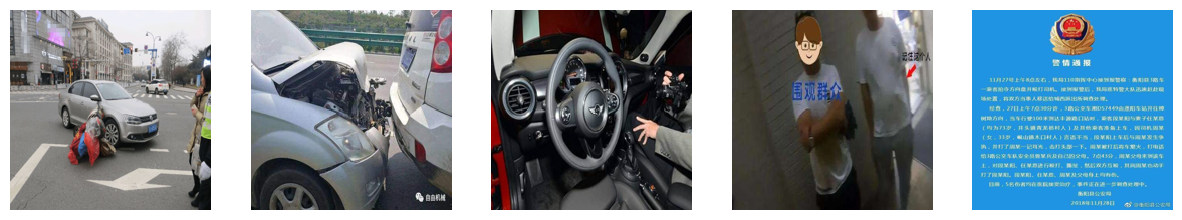

In [7]:
t = {'text_id': 1000007250, 'image_ids': [140010138195, 140010127413, 140010108717, 140010114325, 140010112445]}
t2 = {'text_id': 1000014232, 'image_ids': [140010113141, 140010084864, 140010107274, 140010094023, 140010097347]}
t3 = {'text_id': 1000044181, 'image_ids': [140010075832, 140010102235, 140010120925, 140010091528, 140010091015]}
##展示结果：
show_result(t3)

### 整理结果 导出为 result1.csv

In [21]:

## 读取结果jsonl
text_id = []
similarity_ranking =[]
result_image_id = []

with open(text2img_result, 'r', encoding="utf-8") as f:
    for index,line in enumerate(f):
        data = json.loads(line)
#         print(data)
        for index,v in enumerate(data['image_ids']):
            text_id.append(textid_dict[data['text_id']])
            similarity_ranking.append(index+1)
            result_image_id.append(imgid_dict[v])
        
result1_data = {  
    'text_id': text_id,  
    'similarity_ranking':similarity_ranking,  
    'result_image_id': result_image_id
}  
  
# 使用pd.DataFrame()函数创建DataFrame  
result1_df = pd.DataFrame(result1_data)  
  
# 显示DataFrame的内容  
result1_df


,text_id,similarity_ranking,result_image_id
0,Word-1000007250,1,Image14001013-8195.jpg
1,Word-1000007250,2,Image14001012-7413.jpg
2,Word-1000007250,3,Image14001010-8717.jpg
3,Word-1000007250,4,Image14001011-4325.jpg
4,Word-1000007250,5,Image14001011-2445.jpg
...,...,...,...
495,Word-1000045639,1,Image14001012-8448.jpg
496,Word-1000045639,2,Image14001007-9211.jpg
497,Word-1000045639,3,Image14001012-2334.jpg
498,Word-1000045639,4,Image14001011-2039.jpg


In [22]:
# 使用自定义函数来处理 text_id 列  
def custom_text_id(group):  
    # 仅在第一行保留 text_id，其余行留空  
    group.iloc[0, group.columns.get_loc('text_id')] = group.iloc[0, group.columns.get_loc('text_id')]  
    group.iloc[1:, group.columns.get_loc('text_id')] = ''  
    return group  

# 按 text_id 分组并应用自定义函数  
result = result1_df.groupby('text_id', as_index=False, sort=False).apply(custom_text_id).reset_index(drop=True)  
result

C:\Users\X\AppData\Local\Temp\ipykernel_10256\2643673606.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  result = result1_df.groupby('text_id', as_index=False, sort=False).apply(custom_text_id).reset_index(drop=True)


,text_id,similarity_ranking,result_image_id
0,Word-1000007250,1,Image14001013-8195.jpg
1,,2,Image14001012-7413.jpg
2,,3,Image14001010-8717.jpg
3,,4,Image14001011-4325.jpg
4,,5,Image14001011-2445.jpg
...,...,...,...
495,Word-1000045639,1,Image14001012-8448.jpg
496,,2,Image14001007-9211.jpg
497,,3,Image14001012-2334.jpg
498,,4,Image14001011-2039.jpg


In [23]:
result.to_csv("result1.csv",encoding='utf-8',index=False)